In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import requests

#LinkCOVID19SP = 'https://github.com/seade-R/dados-covid-sp/raw/master/data/dados_covid_sp.csv'
#loadCOVID19SP = requests.get(LinkCOVID19SP).content
loadCOVID19SP = 'https://github.com/seade-R/dados-covid-sp/raw/master/data/dados_covid_sp.csv'

DataCOVID19SP = pd.read_csv(loadCOVID19SP,
                      delimiter=';', 
                      encoding='utf-8',
                      decimal=',',
                      parse_dates=['datahora'])
#                      index_col='datahora')
#DataCOVID19SP.info()

DataCOVID19SP = DataCOVID19SP[['nome_munic','datahora','obitos_mm7d']]

In [12]:
DataCOVID19SP[DataCOVID19SP['nome_munic'] == 'São Paulo'].tail()

,nome_munic,datahora,obitos_mm7d
71142,São Paulo,2020-06-19,110.714286
71756,São Paulo,2020-06-20,110.285714
72370,São Paulo,2020-06-21,109.142857
72984,São Paulo,2020-06-22,107.428571
73598,São Paulo,2020-06-23,109.142857


In [3]:
#convertendo string to float, não é mais necessário depois que configurei a o simbolo decimal corretamente no csv.
#DataCOVID19SP['obitos_mm7d'] = pd.to_numeric(DataCOVID19SP['obitos_mm7d'], errors='coerce')
#DataCOVID19SP[DataCOVID19SP['nome_munic'] == 'São Paulo'].tail(15)

In [13]:
DataCOVID19SP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73800 entries, 0 to 73799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   nome_munic   73800 non-null  object        
 1   datahora     73800 non-null  datetime64[ns]
 2   obitos_mm7d  73800 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.7+ MB


In [5]:
obitos_mm7d_SaoPaulo = DataCOVID19SP[DataCOVID19SP['nome_munic'] == 'São Paulo']
obitos_mm7d_SaoPaulo.tail()

,nome_munic,datahora,obitos_mm7d
71142,São Paulo,2020-06-19,110.714286
71756,São Paulo,2020-06-20,110.285714
72370,São Paulo,2020-06-21,109.142857
72984,São Paulo,2020-06-22,107.428571
73598,São Paulo,2020-06-23,109.142857


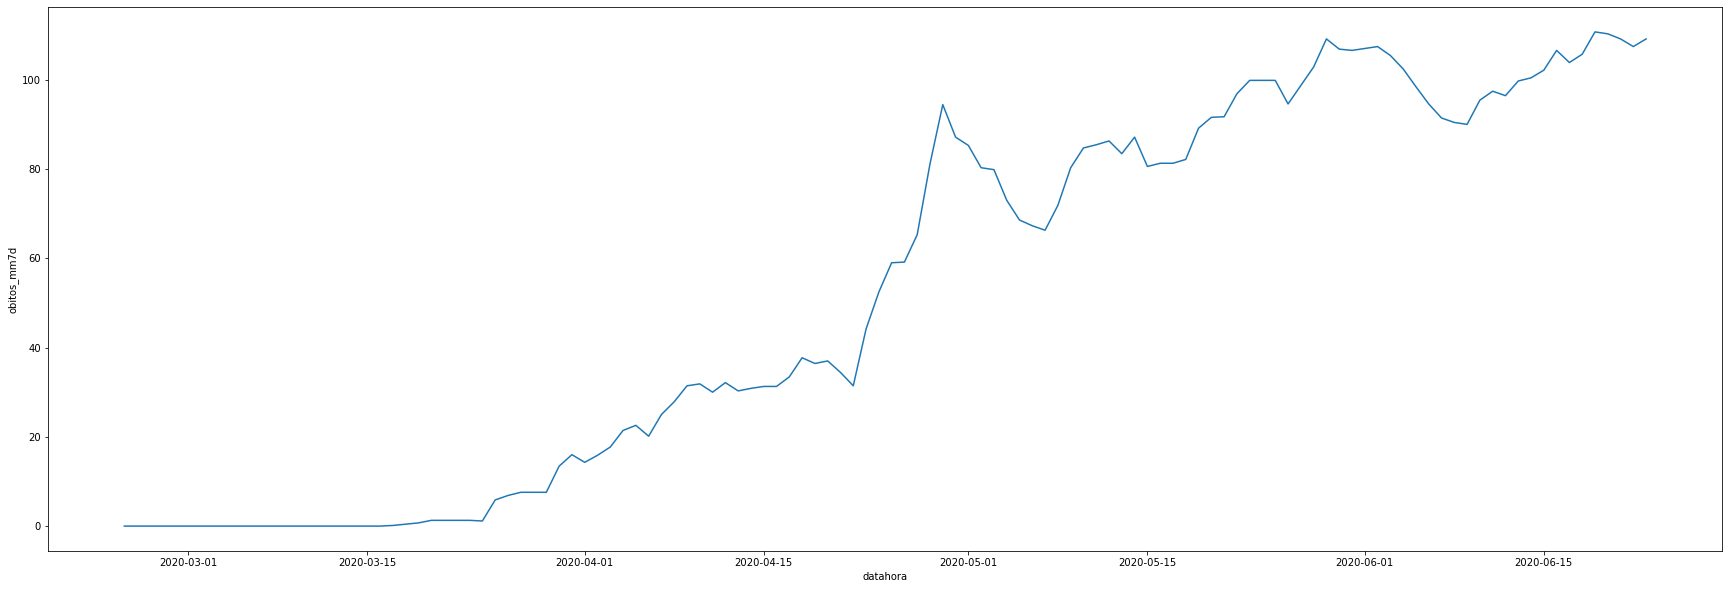

In [14]:
a = obitos_mm7d_SaoPaulo
plt.figure(figsize=(30,10))
sns.lineplot(x='datahora',y='obitos_mm7d', data=a)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.lineplot(x = "datahora", y = "obitos_mm7d", data = obitos_mm7d_SaoPaulo, 
                  estimator = sum, ci = None, ax=ax)
